# Project: Image Classification and Regression

Using TensorFlow backend.


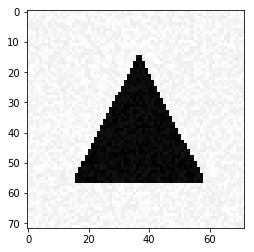

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]



# I. Simple Classification

In [56]:
X_train, Y_train = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [57]:
X_test, Y_test = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [58]:
print(X_train.shape)
print(Y_train.shape)

(300, 5184)
(300,)


In [59]:
from keras.models import Sequential
model = Sequential()

In [60]:
from keras.layers import Dense, Activation, Dropout

model.add(Dense(3, input_shape=(5184,)))
model.add(Dropout(0.2))
model.add(Activation('softmax'))

## Using the stochastic gradient descent optimizer

In [61]:
from keras.optimizers import SGD

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [62]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32)

Train on 300 samples, validate on 300 samples
Epoch 1/10
300/300 [==============================] - 0s 834us/step - loss: 9.3701 - acc: 0.2900 - val_loss: 10.9603 - val_acc: 0.3200
Epoch 2/10
300/300 [==============================] - 0s 112us/step - loss: 11.1808 - acc: 0.3000 - val_loss: 10.9603 - val_acc: 0.3200
Epoch 3/10
300/300 [==============================] - 0s 100us/step - loss: 10.6674 - acc: 0.3233 - val_loss: 10.9603 - val_acc: 0.3200
Epoch 4/10
300/300 [==============================] - 0s 113us/step - loss: 10.9852 - acc: 0.3067 - val_loss: 10.9603 - val_acc: 0.3200
Epoch 5/10
300/300 [==============================] - 0s 102us/step - loss: 11.1450 - acc: 0.2800 - val_loss: 10.9603 - val_acc: 0.3200
Epoch 6/10
300/300 [==============================] - 0s 105us/step - loss: 10.6160 - acc: 0.3100 - val_loss: 10.9603 - val_acc: 0.3200
Epoch 7/10
300/300 [==============================] - 0s 99us/step - loss: 11.4076 - acc: 0.2800 - val_loss: 10.9603 - val_acc: 0.3200
Epoc

## Using the Adam optimizer 

In [63]:
model = Sequential()

model.add(Dense(3, input_shape=(5184,)))
model.add(Dropout(0.2))
model.add(Activation('softmax'))

In [64]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32)

Train on 300 samples, validate on 300 samples
Epoch 1/10
300/300 [==============================] - 0s 958us/step - loss: 1.5196 - acc: 0.4067 - val_loss: 0.9380 - val_acc: 0.6167
Epoch 2/10
300/300 [==============================] - 0s 104us/step - loss: 0.9188 - acc: 0.6033 - val_loss: 0.5998 - val_acc: 0.7233
Epoch 3/10
300/300 [==============================] - 0s 113us/step - loss: 0.7157 - acc: 0.6733 - val_loss: 0.5376 - val_acc: 0.7500
Epoch 4/10
300/300 [==============================] - 0s 106us/step - loss: 0.5376 - acc: 0.7400 - val_loss: 0.6618 - val_acc: 0.7300
Epoch 5/10
300/300 [==============================] - 0s 112us/step - loss: 0.4743 - acc: 0.7867 - val_loss: 0.4061 - val_acc: 0.8000
Epoch 6/10
300/300 [==============================] - 0s 103us/step - loss: 0.3749 - acc: 0.8233 - val_loss: 0.2754 - val_acc: 0.9533
Epoch 7/10
300/300 [==============================] - 0s 111us/step - loss: 0.3510 - acc: 0.8833 - val_loss: 0.2753 - val_acc: 0.9400
Epoch 8/10
300/3

In [66]:
acc = model.evaluate(X_test, Y_test)[1]
print('accuracy =', acc)

300/300 [==============================] - 0s 34us/step
accuracy = 0.99


# II. Visualization

In [67]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#Makes imageplotlib show the images inline
#in Jupyter notebooks:
%matplotlib inline

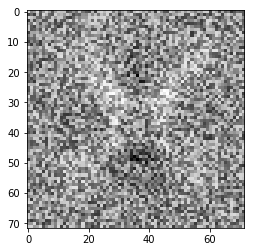

In [68]:
I = model.get_weights()[0][:,0].reshape((72, 72))
plt.imshow(I, cmap = cm.Greys)

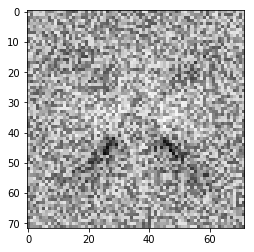

In [69]:
I2 = model.get_weights()[0][:,1].reshape((72, 72))
plt.imshow(I2, cmap = cm.Greys)

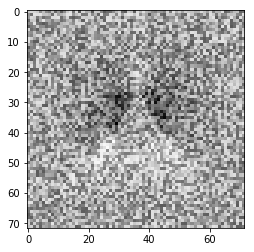

In [70]:
I3 = model.get_weights()[0][:,2].reshape((72, 72))
plt.imshow(I3, cmap = cm.Greys)

# III. A More Difficult Classification

In [74]:
X_train, Y_train = generate_dataset_classification(300, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [75]:
X_test, Y_test = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [76]:
# Reformatting the input
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [77]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 3)

In [78]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(72, 72, 1)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(3))
model.add(Dropout(0.2))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
dropout_12 (Dropout)         (None, 68, 68, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 55491     
_________________________________________________________________
dropout_13 (Dropout)         (None, 3)                 0         
_________________________________________________________________
activation_10 (Activation)   (None, 3)                 0         
Total para

In [79]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=32)

Train on 300 samples, validate on 300 samples
Epoch 1/30
300/300 [==============================] - 1s 3ms/step - loss: 1.0991 - acc: 0.2933 - val_loss: 1.0985 - val_acc: 0.3300
Epoch 2/30
300/300 [==============================] - 1s 2ms/step - loss: 1.0980 - acc: 0.3733 - val_loss: 1.0982 - val_acc: 0.3300
Epoch 3/30
300/300 [==============================] - 1s 2ms/step - loss: 1.0968 - acc: 0.3733 - val_loss: 1.0990 - val_acc: 0.3300
Epoch 4/30
300/300 [==============================] - 1s 2ms/step - loss: 1.0953 - acc: 0.3633 - val_loss: 1.1007 - val_acc: 0.3300
Epoch 5/30
300/300 [==============================] - 1s 2ms/step - loss: 1.0952 - acc: 0.3667 - val_loss: 1.0995 - val_acc: 0.3300
Epoch 6/30
300/300 [==============================] - 1s 2ms/step - loss: 1.0959 - acc: 0.3500 - val_loss: 1.0979 - val_acc: 0.3300
Epoch 7/30
300/300 [==============================] - 1s 2ms/step - loss: 1.0952 - acc: 0.3567 - val_loss: 1.0987 - val_acc: 0.3300
Epoch 8/30
300/300 [==========

In [81]:
acc = model.evaluate(X_test, Y_test)[1]
print('accuracy =', acc)

300/300 [==============================] - 0s 632us/step
accuracy = 0.33


# IV. Regression

In [167]:
X_train, Y_train = generate_dataset_regression(300, 20)
model.add(BatchNormalization())

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [168]:
X_test, Y_test = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [169]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [170]:
model = Sequential()

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(6))
model.add(Dropout(0.2))

In [171]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [172]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=32)

Train on 300 samples, validate on 300 samples
Epoch 1/20
300/300 [==============================] - 2s 7ms/step - loss: 0.2084 - val_loss: 10.7967
Epoch 2/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1280 - val_loss: 11.1041
Epoch 3/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1229 - val_loss: 7.7543
Epoch 4/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1175 - val_loss: 6.1912
Epoch 5/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1052 - val_loss: 4.1022
Epoch 6/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1101 - val_loss: 2.2216
Epoch 7/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1126 - val_loss: 1.4097
Epoch 8/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1001 - val_loss: 1.1630
Epoch 9/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1031 - val_loss: 0.6866
Epoch 10/20
300/300 [==============================]

In [173]:
pred = model.predict(X_test)

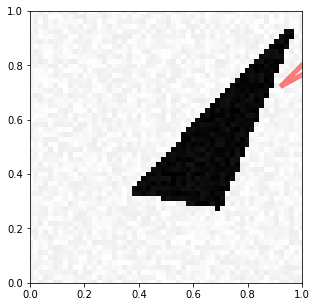

In [174]:
visualize_prediction(X_test[0], pred[0])